</br></br></br><p style="text-align: center;"><span style=" font-family: 'Bebas Neue'; font-size: 5em;">**Breast Cancer Prediction**</span></p></br></br></br>

About Breast Cancer Wisconsin (Diagnostic) Data Set Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

**Data Content**</br>

ID number</br>
Diagnosis (M = malignant, B = benign)</br>
radius (mean of distances from center to points on the perimeter)</br>
texture (standard deviation of gray-scale values)</br>
perimeter</br>
area</br>
smoothness (local variation in radius lengths)</br>
compactness (perimeter^2 / area - 1.0)</br>
concavity (severity of concave portions of the contour)</br>
concave points (number of concave portions of the contour)</br>
symmetry</br>
fractal dimension ("coastline approximation" - 1)</br>

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.</br>
All feature values are recoded with four significant digits.</br>
Missing attribute values: none</br>
Class distribution: 357 benign, 212 malignant</br>

There are 3 things that take my attention</br>

 1) There is an id that cannot be used for classificaiton</br>
 2) Diagnosis is our class label</br>
 3) Unnamed: 32 feature includes NaN so we do not need it.</br>

Therefore, drop these unnecessary features.

In [5]:
###Loading the packages.

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 
%matplotlib inline

In [6]:
plt.style.use("seaborn")

In [7]:
# Loading the data
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
### Showing the name of all columns
print(df.columns)
print("\nShape = ",df.shape)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

Shape =  (569, 33)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


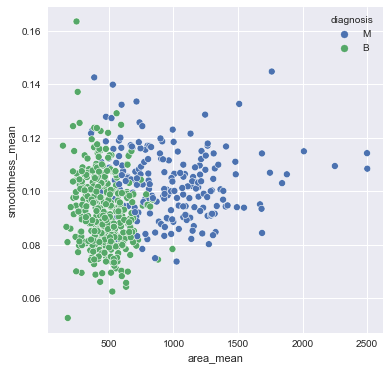

In [11]:
plt.style.use("seaborn")
plt.figure(figsize=(6, 6))
sns.scatterplot(x = df['area_mean'], y = df['smoothness_mean'], hue = df['diagnosis'], data = df)
plt.show()

In [12]:
### Seperating the Target feature and other features
y = df.diagnosis                          # M or B 
list = ['Unnamed: 32','id','diagnosis']
x = df.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In order to conduct our analysis easily, we have converted the target column as:</br>
   **Malignant** - 1</br>
   **Benignant** - 0</br>

In [13]:
y.replace({"M":1,"B":0},inplace=True)

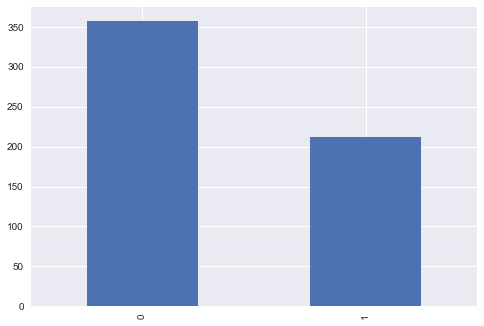

In [14]:
df.diagnosis.value_counts().plot(kind='bar')
plt.show()

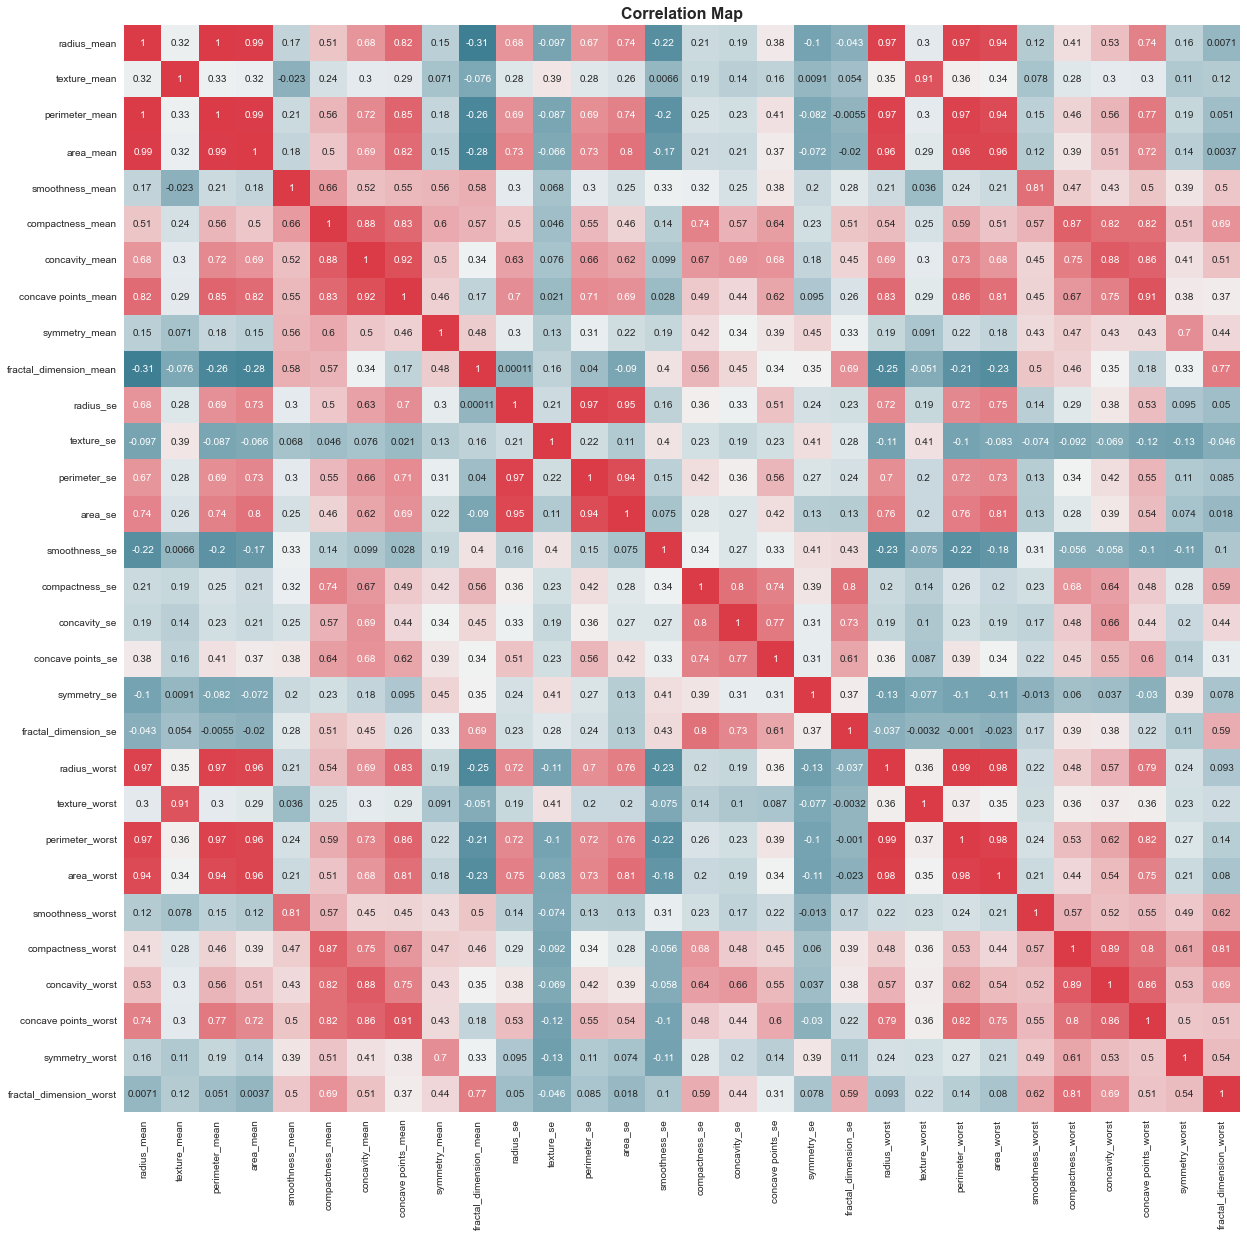

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(x.corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True), annot = True,cbar=False)
plt.title("Correlation Map", fontweight = "bold", fontsize=16)
plt.show()

</br></br></br><p style="text-align: center;"><span style="font-family: 'Bebas Neue'; font-size: 2em;">**Feature selection with correlation and random forest classification**</span></p></br></br></br>

As it can be seen in map heat figure **radius_mean, perimeter_mean** and **area_mean** are correlated with each other so we will use only **area_mean**. If you ask how i choose **area_mean** as a feature to use, well actually there is no correct answer, I just look at swarm plots and **area_mean** looks like clear for me but we cannot make exact separation among other correlated features without trying. So lets find other correlated features and look accuracy with random forest classifier.

**Compactness_mean, concavity_mean** and **concave points_mean** are correlated with each other.Therefore I only choose **concavity_mean**. Apart from these, **radius_se, perimeter_se** and **area_se** are correlated and I only use **area_se**. **radius_worst, perimeter_worst** and **area_worst** are correlated so I use **area_worst**. **Compactness_worst, concavity_worst** and **concave points_worst** so I use **concavity_worst**. **Compactness_se, concavity_se** and **concave points_se** so I use **concavity_se**. **texture_mean** and **texture_worst** are correlated and I use **texture_mean**. **area_worst** and **area_mean** are correlated, I use **area_mean**.

In [16]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )  
print(x_1.shape)
x_1.head()

(569, 16)


,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


After drop correlated features, as it can be seen in below correlation matrix, there are no more correlated features. Actually, I know and you see there is correlation value 0.9 but lets see together what happen if we do not drop it.

<AxesSubplot:>

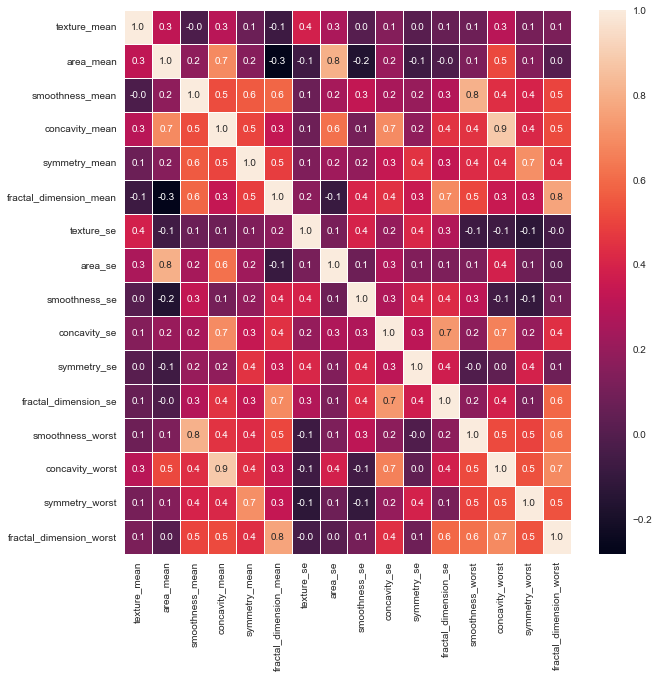

In [17]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score


Accuracy is:  0.9463414634146341


<AxesSubplot:>

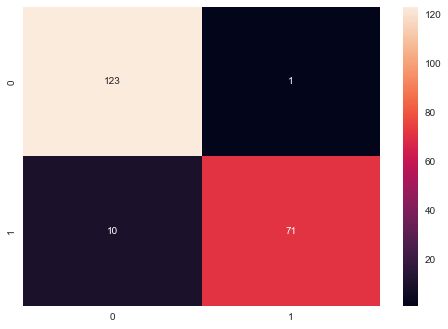

In [19]:

# split data train 64 % and test 36 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.36, random_state=18)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

We can see that, we have achieved an accurary of **94.6%** with making a few wrong predictions.

</br></br></br><p style="text-align: center;"><span style="font-family: 'Bebas Neue'; font-size: 2em;">**Tree based feature selection and random forest classification**</span></p></br></br></br>

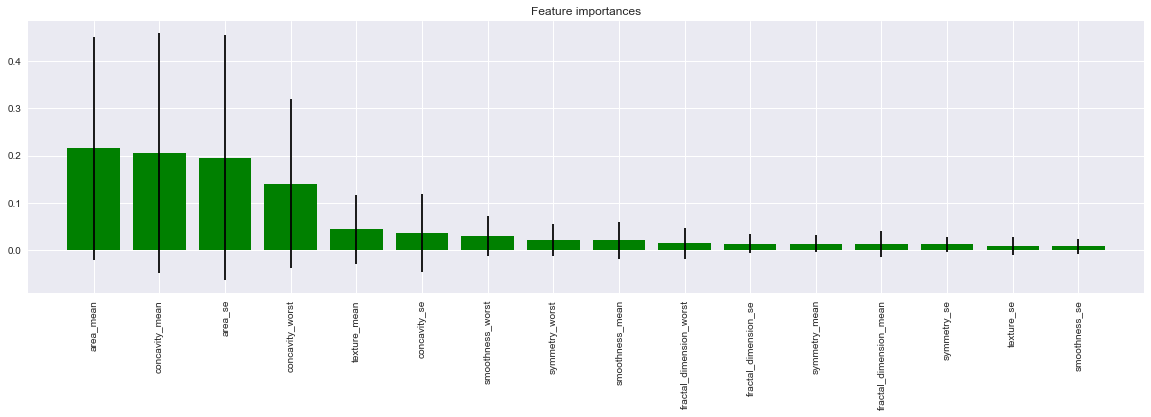

In [20]:
clf_rf_1 = RandomForestClassifier()      
clr_rf_1 = clf_rf_1.fit(x_train,y_train)
importances = clr_rf_1.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
# print("Feature ranking:")

# for f in range(x_train.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(20, 5))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])

plt.show()

Finding the optimal number of features

In [21]:
test_accuracies = []
t = x_train
t_2 = x_test

to_be_removed = []
for f in range(16):
    to_be_removed.append(x_train.columns[indices[f]])

for i in range(16,0,-1):
    clf_rf = RandomForestClassifier(random_state=43) 
    clr_rf = clf_rf.fit(t,y_train)
    test_ac = accuracy_score(y_test,clf_rf.predict(t_2))
    test_accuracies.append(test_ac)
    t = t.drop(to_be_removed[i-1],axis=1)
    t_2 = t_2.drop(to_be_removed[i-1],axis=1)

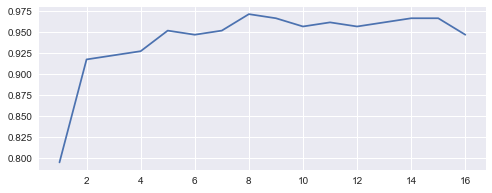

In [22]:
plt.figure(figsize=(8,3))
x_place = [16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
plt.plot(x_place,test_accuracies)
plt.show()

So, we can see that **12 features** give us the **best accuracy = 97.07%**.

Selecting top 12 features required for training the model for feature extraction using **PCA**

In [23]:
tweleve = indices[:12]
for f in range(len(tweleve)):
    print("%d. feature %d (%f)" % (f + 1, tweleve[f], importances[tweleve[f]]),end=' - ')
    print(x_train.columns[tweleve[f]])
removal_list = ['symmetry_mean','texture_se','symmetry_se','smoothness_se']
x_train_12 = x_train.drop(removal_list,axis=1)
print(x_train_12.shape)
x_train_12.head()


1. feature 1 (0.215407) - area_mean
2. feature 3 (0.205646) - concavity_mean
3. feature 7 (0.196049) - area_se
4. feature 13 (0.141192) - concavity_worst
5. feature 0 (0.044247) - texture_mean
6. feature 9 (0.036530) - concavity_se
7. feature 12 (0.030493) - smoothness_worst
8. feature 14 (0.022128) - symmetry_worst
9. feature 2 (0.020994) - smoothness_mean
10. feature 15 (0.014807) - fractal_dimension_worst
11. feature 11 (0.014151) - fractal_dimension_se
12. feature 4 (0.013977) - symmetry_mean
(364, 12)


,texture_mean,area_mean,smoothness_mean,concavity_mean,fractal_dimension_mean,area_se,concavity_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
276,14.16,396.6,0.09379,0.001487,0.05821,17.09,0.001487,0.001627,0.1259,0.004955,0.2758,0.06386
494,20.54,538.7,0.07335,0.018000,0.05888,26.07,0.013410,0.002701,0.1118,0.076980,0.2687,0.07429
239,39.28,920.6,0.09812,0.141700,0.05966,49.00,0.026020,0.002759,0.1365,0.324100,0.2853,0.08496
227,15.51,684.5,0.08371,0.065050,0.05907,19.88,0.036440,0.003204,0.1136,0.340200,0.2954,0.08362
484,11.28,747.2,0.10430,0.119100,0.06259,13.87,0.033360,0.002256,0.1541,0.400400,0.2557,0.08181


In [24]:
x_test_12 =  x_test.drop(removal_list,axis=1)
x_test_12.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,fractal_dimension_mean,area_se,concavity_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
232,33.81,386.8,0.07780,0.004967,0.05828,15.46,0.003223,0.002534,0.09994,0.02318,0.2911,0.07307
490,22.44,466.5,0.08192,0.017140,0.05976,18.04,0.009410,0.002399,0.12560,0.12300,0.3100,0.08203
543,28.06,538.4,0.08671,0.029870,0.05781,17.85,0.014980,0.001343,0.10720,0.10620,0.2473,0.06443
160,20.18,419.8,0.10890,0.068430,0.06453,38.34,0.041670,0.005061,0.13580,0.19560,0.3168,0.07987
8,21.82,519.8,0.12730,0.185900,0.07389,24.32,0.035530,0.003749,0.17030,0.53900,0.4378,0.10720


</br></br></br><p style="text-align: center;"><span style="font-family: 'Bebas Neue'; font-size: 2em;">**Using PCA for Feature Extraction**</span></p></br></br></br>

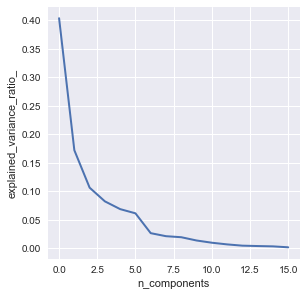

In [26]:
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(5, 5))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.grid(True)
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')
plt.show()

</br></br></br><p style="text-align: center;"><span style="font-family: 'Bebas Neue'; font-size: 2em;">**Using various ML Algorithms**</span></p></br></br></br>

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

import time

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [28]:
acc_train = []
acc_test = []
pres_train = []
pres_test = []
rec_train = []
rec_test = []
f1_train = []
f1_test = []
train_time = []
test_time = []
confusion_matrixs = []

In [29]:
def classification_model_report(model,name,n):
  #Fit the model:
  model = model.fit(x_train_12,y_train)
  
  #Make predictions on training set:
  start_time = time.time()
  pred_train = model.predict(x_train_12)
  end_time = time.time()
  train_time_model = end_time-start_time
  train_time.append(train_time_model)

  start_time = time.time()
  pred_test = model.predict(x_test_12)
  end_time = time.time()
  test_time_model = end_time-start_time
  test_time.append(test_time_model)
  
  #Print accuracy
  ac_train = accuracy_score(y_train,pred_train)
  ac_test = accuracy_score(y_test,pred_test)
  acc_train.append(ac_train)
  acc_test.append(ac_test)
  

  #Print precision
  pr_train = precision_score(y_train, pred_train)
  pr_test = precision_score(y_test, pred_test)
  pres_train.append(pr_train)
  pres_test.append(pr_test)
  
  #Print recall
  re_train = recall_score(y_train, pred_train)
  re_test = recall_score(y_test, pred_test)
  rec_train.append(re_train)
  rec_test.append(re_test)
  
  #Print f1_score
  f_train = f1_score(y_train, pred_train)
  f_test = f1_score(y_test, pred_test)
  f1_train.append(f_train)
  f1_test.append(f_test)

  #confusion matrix
  cm = confusion_matrix(y_test,pred_test) 
  confusion_matrixs.append(cm)

  if n==1:
    print("|| "+name+" ||\n")
    print("------------------------------------------------------------------------------------------------------------------------------\n")
    print("Trainning\n")
    print("Time: ",train_time_model, end=" || ")
    print("Accuracy: ",round(ac_train,5), end=" || ")
    print("Precision: ",round(pr_train,5), end=" || ")
    print("Recall: ",round(re_train,5), end=" || ")
    print("f1_score: ",round(f_train,5))
    print("\n------------------------------------------------------------------------------------------------------------------------------\n")
    print("Testing\n")
    print("Time: ",test_time_model, end=" || ")
    print("Accuracy: ",round(ac_test,5), end=" || ")
    print("Precision: ",round(pr_test,5), end=" || ")
    print("Recall: ",round(re_test,5), end=" || ")
    print("f1_score: ",round(f_test,5))
    print("\n------------------------------------------------------------------------------------------------------------------------------\n")
  


</br></br><p style="text-align: center;"><span style="font-family: 'Bebas Neue'; font-size: 2em;"> **Hypertuning various alorithms** </span></p></br></br>

<p style="text-align: center;"><span style="font-family: 'Bebas Neue'; font-size: 1.5em;"> KNN </span></p>

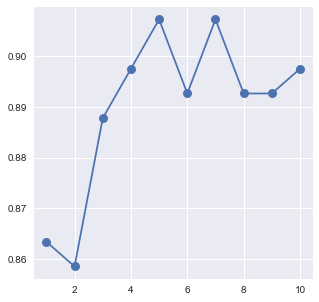

In [30]:
acc_rate=[]

for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_12, y_train)
    pred=knn.predict(x_test_12)
    acc_rate.append(np.mean(pred==y_test))
    
plt.figure(figsize=(5,5))
plt.grid(True)
plt.plot(range(1,11), acc_rate,marker='o', markersize=9)
plt.show()

Thus KNN works best at **neighbours=5**.

<p style="text-align: center;"><span style="font-family: 'Bebas Neue'; font-size: 1.5em;"> C4.5 and CART </span></p>

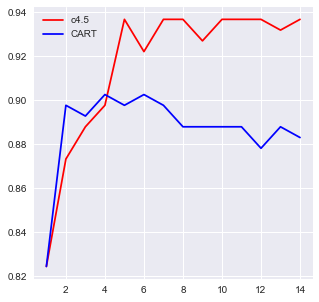

In [31]:
acc_rate_1=[]
acc_rate_2=[]

for i in range(1,15):
    c4_5 = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    cart = DecisionTreeClassifier(criterion="gini", max_depth = i)
    c4_5.fit(x_train_12, y_train)
    cart.fit(x_train_12, y_train)
    pred1=c4_5.predict(x_test_12)
    pred2=cart.predict(x_test_12)
    acc_rate_1.append(np.mean(pred1==y_test))
    acc_rate_2.append(np.mean(pred2==y_test))
    
plt.figure(figsize=(5,5))
plt.grid(True)
plt.plot(range(1,15), acc_rate_1,'r')
plt.plot(range(1,15), acc_rate_2,'b')
plt.legend(['c4.5','CART'])
plt.show()

Thus, **CART** works best at max_depth = 5 and **C4.5** works best at max_depth=4 

<p style="text-align: center;"><span style="font-family: 'Bebas Neue'; font-size: 1.5em;"> SVM </span></p>

In [32]:
svc = SVC()
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(x_train_12, y_train)
grid_search.best_params_

{'C': 15, 'gamma': 0.0001}

<p style="text-align: center;"><span style="font-family: 'Bebas Neue'; font-size: 1.5em;"> Gradient Boosting </span></p>

In [33]:
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(x_train_12, y_train)
grid_search_gbc.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 150}

</br></br></br><p style="text-align: center;"><span style="font-family: 'Bebas Neue'; font-size: 2em;">**Creating ML Models**</span></p></br></br></br>

In [34]:
model_name = ['C4.5','CART','RandomForest','Gaussian NaiveBayes','SVM','KNN','LogisticRegression','AdaBoost','GradientBoosting','xgb']

scaler = StandardScaler()
x_train_12 = scaler.fit_transform(x_train_12)
x_test_12 = scaler.transform(x_test_12)

model1 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model2 = DecisionTreeClassifier(criterion="gini", max_depth = 5)
model3 = RandomForestClassifier(n_estimators=60, random_state=0)
model4 = GaussianNB()
model5 = SVC(C = 15, gamma = 0.01)
model6 = KNeighborsClassifier(n_neighbors = 5)
model7 = LogisticRegression()
model8 = AdaBoostClassifier()
model9 = GradientBoostingClassifier(learning_rate = 1, loss = 'exponential', n_estimators = 150)
model10 = xgb.XGBClassifier(random_state=0,booster="gbtree")

models = [model1,model2,model3,model4,model5,model6,model7,model8,model9,model10]

In [ ]:
for i in range(10):
    classification_model_report(models[i],model_name[i],0)

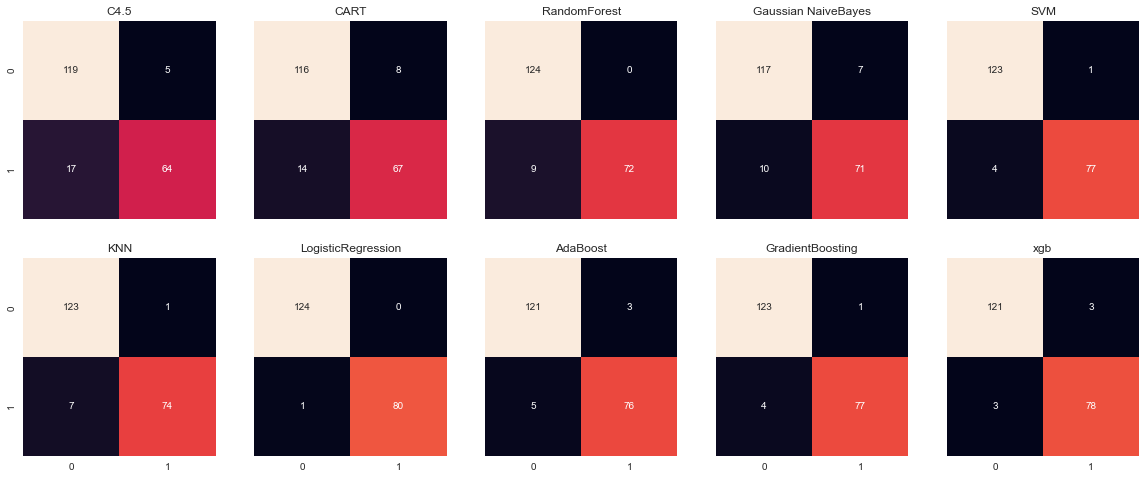

In [36]:
plt.subplots(ncols=5, nrows=2,figsize=(20,8),sharey=True,sharex=True)
for i in range(1,11):
    plt.subplot(2,5,i)
    sns.heatmap(confusion_matrixs[i-1],annot=True,fmt="d",cbar=False)
    plt.title(model_name[i-1])

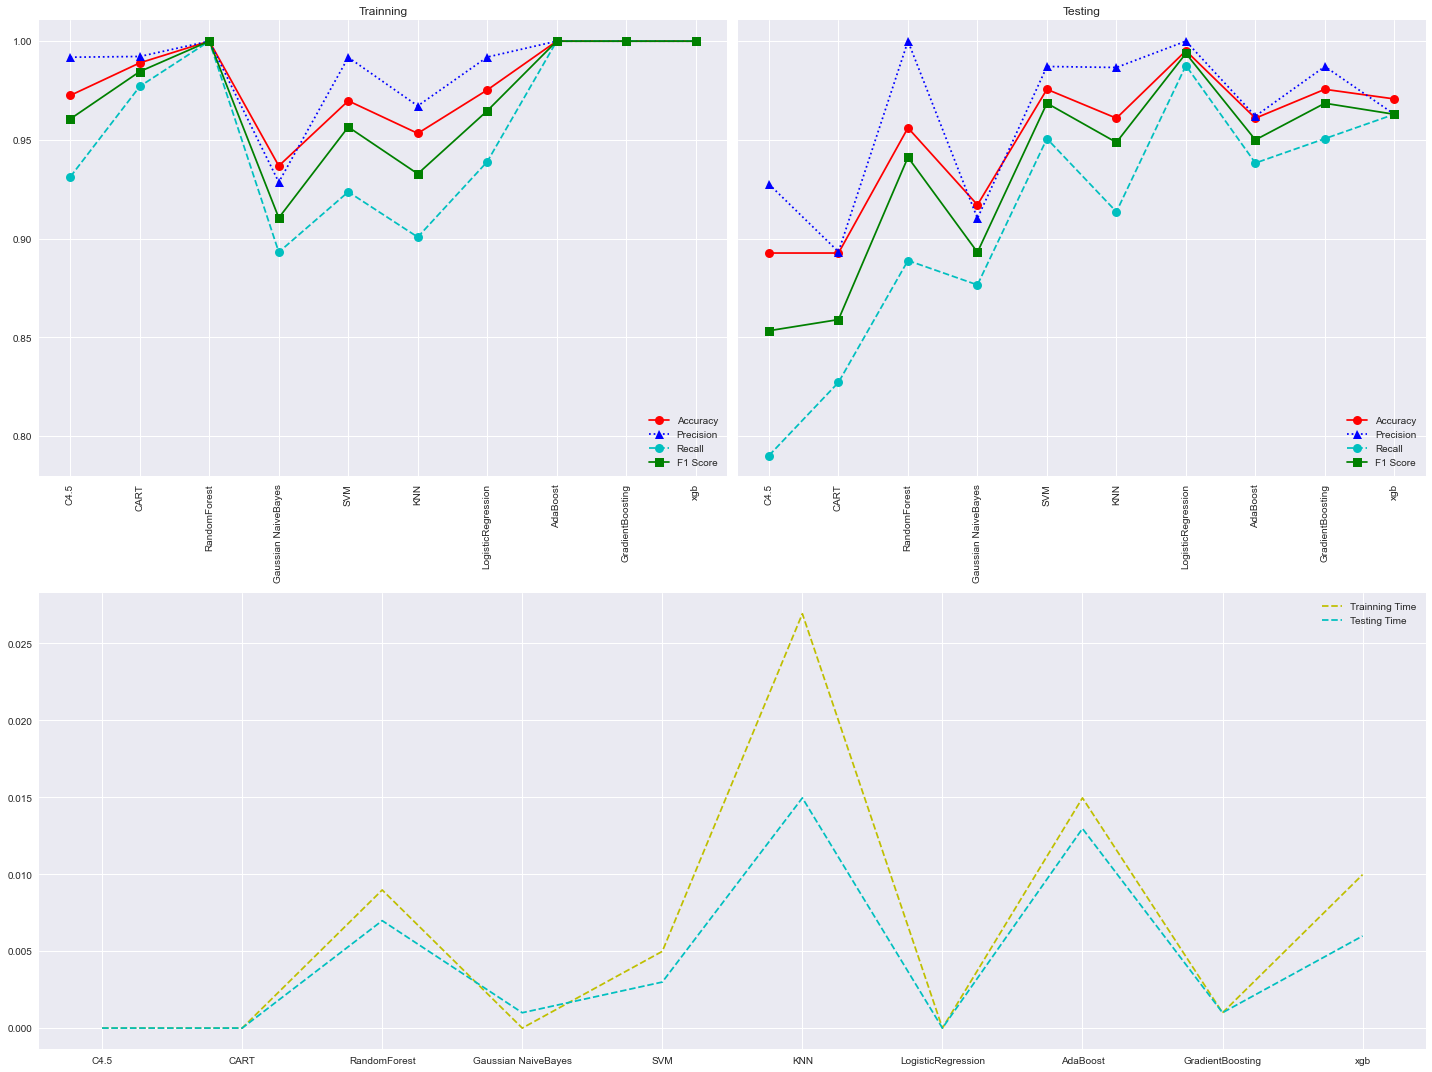

In [37]:
fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(20,15),sharey=True)
gs = axs[1, 0].get_gridspec()
plt.subplot(2,2,1)
plt.plot(model_name,acc_train,'r',marker='o', markersize=9)
plt.plot(model_name,pres_train,'b:',marker='^', markersize=9)
plt.plot(model_name,rec_train,'c--',marker='o', markersize=9)
plt.plot(model_name,f1_train,'g',marker='s', markersize=9)
plt.xticks(rotation=90)
plt.title("Trainning")
plt.grid(True)
plt.legend(['Accuracy','Precision','Recall','F1 Score'],loc ="lower right")

plt.subplot(2,2,2)
plt.plot(model_name,acc_test,'r',marker='o', markersize=9)
plt.plot(model_name,pres_test,'b:',marker='^', markersize=9)
plt.plot(model_name,rec_test,'c--',marker='o', markersize=9)
plt.plot(model_name,f1_test,'g',marker='s', markersize=9)
plt.xticks(rotation=90)
plt.title("Testing")
plt.grid(True)
plt.legend(['Accuracy','Precision','Recall','F1 Score'],loc ="lower right")

for ax in axs[1,:]:
    ax.remove()
axbig = fig.add_subplot(gs[1,:])

plt.plot(model_name,train_time,'y--')
plt.plot(model_name,test_time,'c--')
plt.legend(['Trainning Time','Testing Time'],loc ="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

Here, we observe that Logistic Regression performs very well both in terms of **time** and **performance**. It has accquired an accuracy of **99.5%**

In [38]:
for i in range(len(model_name)):
    print(model_name[i]+" : "+str(acc_test[i]*100))

C4.5 : 89.26829268292683
CART : 89.26829268292683
RandomForest : 95.60975609756098
Gaussian NaiveBayes : 91.70731707317074
SVM : 97.5609756097561
KNN : 96.09756097560975
LogisticRegression : 99.51219512195122
AdaBoost : 96.09756097560975
GradientBoosting : 97.5609756097561
xgb : 97.07317073170731


In [39]:
###Choosing the best models for creating the meta - learning models.
selected_names = []
selected_models = []
selected_acc = []
for i in range(len(model_name)):
    if acc_test[i]>0.95:
        selected_names.append(model_name[i])
        selected_models.append(models[i])
        selected_acc.append(acc_test[i])
for i in range(len(selected_models)):
    print(selected_names[i]+" : "+str(selected_acc[i]*100))

RandomForest : 95.60975609756098
SVM : 97.5609756097561
KNN : 96.09756097560975
LogisticRegression : 99.51219512195122
AdaBoost : 96.09756097560975
GradientBoosting : 97.5609756097561
xgb : 97.07317073170731


</br></br></br><p style="text-align: center;"><span style="font-family: 'Bebas Neue'; font-size: 2em;">**Creating Meta - Learning models**</span></p></br></br></br>

In [40]:
def estimate_creator(l):
    estm = []
    for i in l:
        estm.append((selected_names[i],selected_models[i]))
    return estm

In [41]:
from sklearn.ensemble import StackingClassifier

l = [[0,1,2,3,4],[3,1,5,6,2],[0,3,5],[0,1,3,5],[0,1,2,3,4,5,6],[3,6,1,2,4],[3,2,1,6,5],[3,1]]

estimator_list = []
for i in range(len(l)):
    estimator_list.append(estimate_creator(l[i]))

# Build stack model
stack_model_list = []
for i in range(len(l)):
    stack_model_list.append(StackingClassifier(estimators=estimator_list[i], final_estimator=LogisticRegression()))

stack_model_name = []
for i in range(len(l)):
    stack_model_name.append(str("Meta Model "+str(i+1)))

In [42]:
stack_acc_train = []
stack_acc_test = []
stack_pres_train = []
stack_pres_test = []
stack_rec_train = []
stack_rec_test = []
stack_f1_train = []
stack_f1_test = []
stack_train_time = []
stack_test_time = []
stack_confusion_matrixs = []
test_prediction = []
train_prediction = []

In [43]:
def stack_classification_model_report(model,name,n):
  #Fit the model:
  model = model.fit(x_train_12,y_train)
  
  #Make predictions on training set:
  start_time = time.time()
  pred_train = model.predict(x_train_12)
  end_time = time.time()
  train_time_model = end_time-start_time
  stack_train_time.append(train_time_model)
  train_prediction.append(pred_train)

  start_time = time.time()
  pred_test = model.predict(x_test_12)
  end_time = time.time()
  test_time_model = end_time-start_time
  stack_test_time.append(test_time_model)
  test_prediction.append(pred_test)
  
  #Print accuracy
  ac_train = accuracy_score(y_train,pred_train)
  ac_test = accuracy_score(y_test,pred_test)
  stack_acc_train.append(ac_train)
  stack_acc_test.append(ac_test)
  
  #Print precision
  pr_train = precision_score(y_train, pred_train)
  pr_test = precision_score(y_test, pred_test)
  stack_pres_train.append(pr_train)
  stack_pres_test.append(pr_test)
  
  #Print recall
  re_train = recall_score(y_train, pred_train)
  re_test = recall_score(y_test, pred_test)
  stack_rec_train.append(re_train)
  stack_rec_test.append(re_test)
  
  #Print f1_score
  f_train = f1_score(y_train, pred_train)
  f_test = f1_score(y_test, pred_test)
  stack_f1_train.append(f_train)
  stack_f1_test.append(f_test)

  #confusion matrix
  cm = confusion_matrix(y_test,pred_test) 
  stack_confusion_matrixs.append(cm)

  if n==1:
    print("|| "+name+" ||\n")
    print("------------------------------------------------------------------------------------------------------------------------------\n")
    print("Trainning\n")
    print("Time: ",train_time_model, end=" || ")
    print("Accuracy: ",round(ac_train,5), end=" || ")
    print("Precision: ",round(pr_train,5), end=" || ")
    print("Recall: ",round(re_train,5), end=" || ")
    print("f1_score: ",round(f_train,5))
    print("\n------------------------------------------------------------------------------------------------------------------------------\n")
    print("Testing\n")
    print("Time: ",test_time_model, end=" || ")
    print("Accuracy: ",round(ac_test,5), end=" || ")
    print("Precision: ",round(pr_test,5), end=" || ")
    print("Recall: ",round(re_test,5), end=" || ")
    print("f1_score: ",round(f_test,5))
    print("\n------------------------------------------------------------------------------------------------------------------------------\n")

In [ ]:
for i in range(len(l)):
    stack_classification_model_report(stack_model_list[i],stack_model_name[i],0)

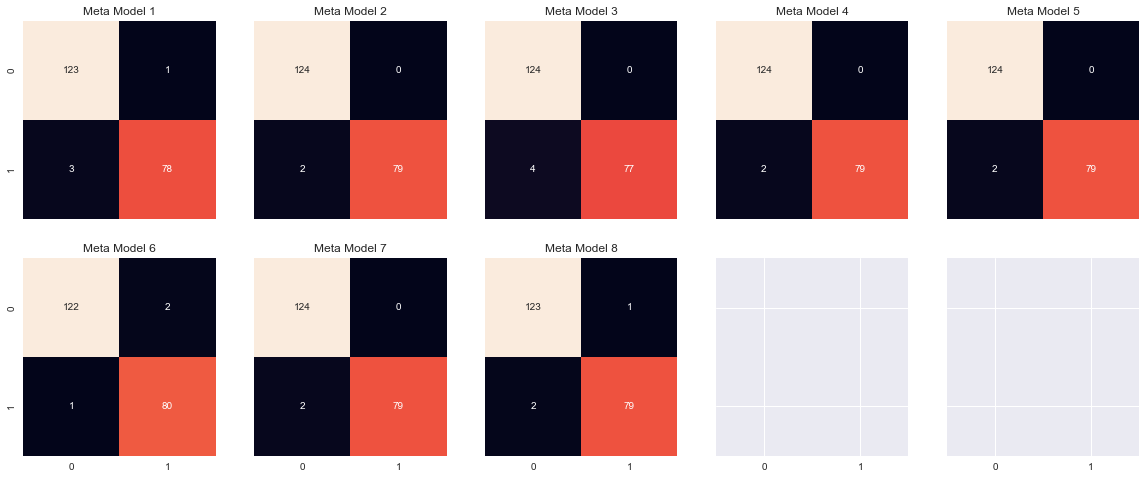

In [45]:
plt.subplots(ncols=5, nrows=2,figsize=(20,8),sharey=True,sharex=True)
for i in range(len(l)):
    plt.subplot(2,5,i+1)
    sns.heatmap(stack_confusion_matrixs[i],annot=True,fmt="d",cbar=False)
    plt.title(stack_model_name[i])

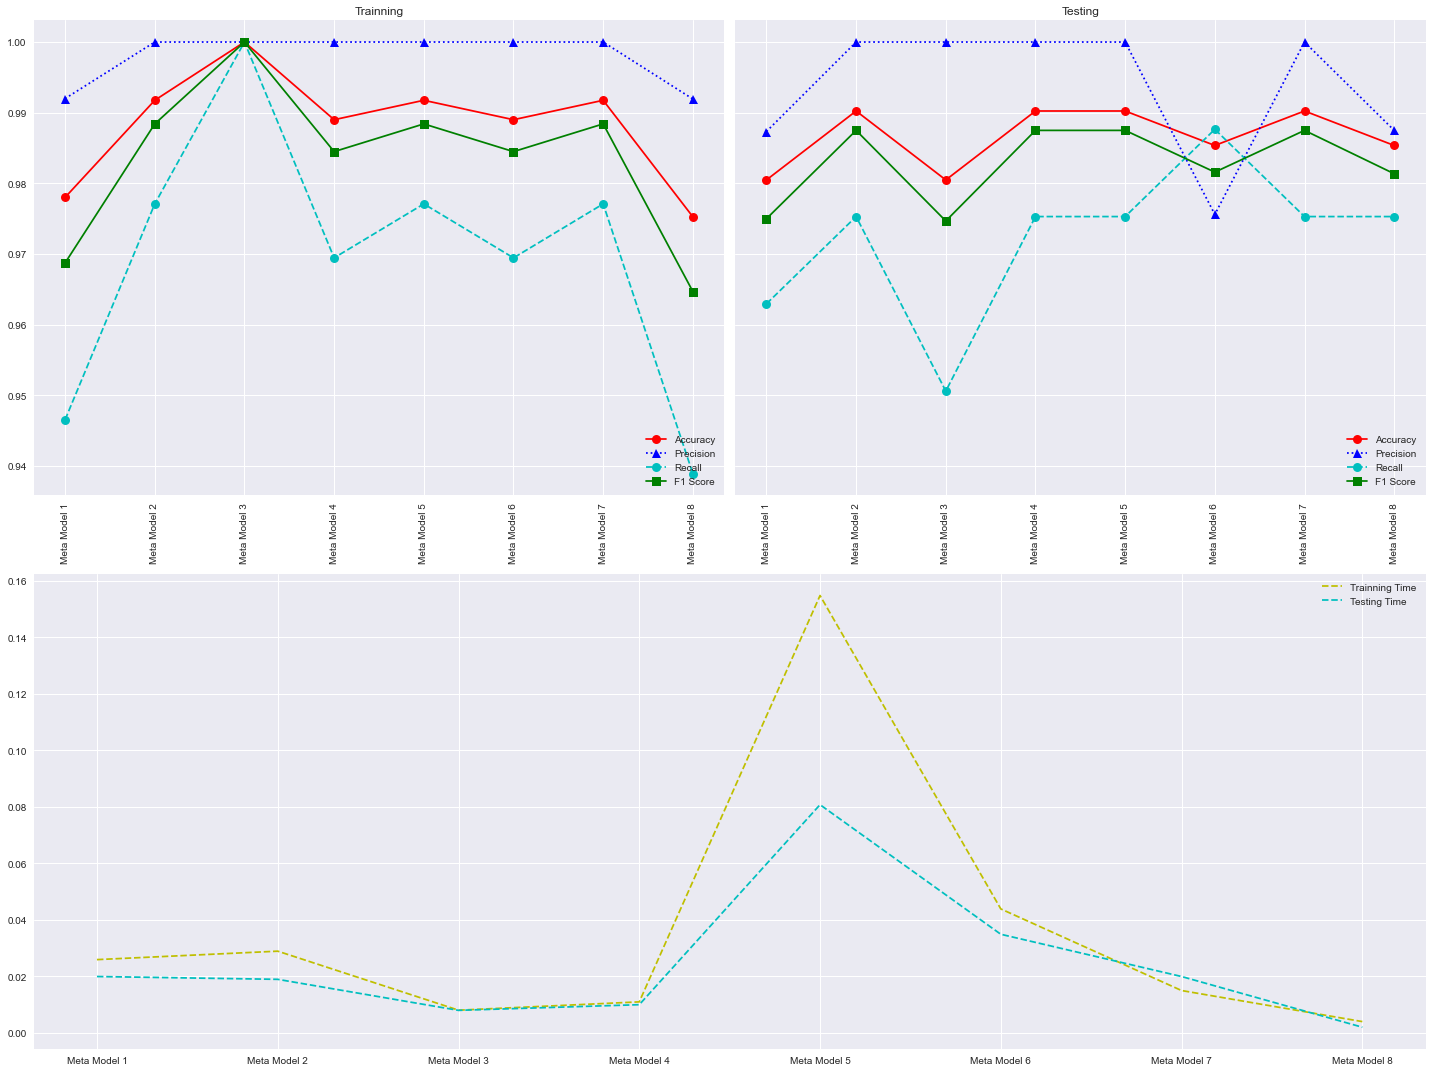

In [46]:
fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(20,15),sharey=True)
gs = axs[1, 0].get_gridspec()
plt.subplot(2,2,1)
plt.plot(stack_model_name,stack_acc_train,'r',marker='o', markersize=9)
plt.plot(stack_model_name,stack_pres_train,'b:',marker='^', markersize=9)
plt.plot(stack_model_name,stack_rec_train,'c--',marker='o', markersize=9)
plt.plot(stack_model_name,stack_f1_train,'g',marker='s', markersize=9)
plt.xticks(rotation=90)
plt.title("Trainning")
plt.grid(True)
plt.legend(['Accuracy','Precision','Recall','F1 Score'],loc ="lower right")

plt.subplot(2,2,2)
plt.plot(stack_model_name,stack_acc_test,'r',marker='o', markersize=9)
plt.plot(stack_model_name,stack_pres_test,'b:',marker='^', markersize=9)
plt.plot(stack_model_name,stack_rec_test,'c--',marker='o', markersize=9)
plt.plot(stack_model_name,stack_f1_test,'g',marker='s', markersize=9)
plt.xticks(rotation=90)
plt.title("Testing")
plt.grid(True)
plt.legend(['Accuracy','Precision','Recall','F1 Score'],loc ="lower right")

for ax in axs[1,:]:
    ax.remove()
axbig = fig.add_subplot(gs[1,:])

plt.plot(stack_model_name,stack_train_time,'y--')
plt.plot(stack_model_name,stack_test_time,'c--')
plt.legend(['Trainning Time','Testing Time'],loc ="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
for i in range(len(stack_model_name)):
    print(stack_model_name[i]+" : "+str(stack_acc_test[i]*100))

Meta Model 1 : 98.04878048780488
Meta Model 2 : 99.02439024390245
Meta Model 3 : 98.04878048780488
Meta Model 4 : 99.02439024390245
Meta Model 5 : 99.02439024390245
Meta Model 6 : 98.53658536585365
Meta Model 7 : 99.02439024390245
Meta Model 8 : 98.53658536585365


</br></br></br><p style="text-align: center;"><span style="font-family: 'Bebas Neue'; font-size: 2em;"> **Creating ANN Model using Meta Learning Models** </span></br></br></br>

In [48]:
### Creating dataset for ANN Model
creator = {}
for i in range(len(l)):
    creator[stack_model_name[i]] = train_prediction[i]

df_ann = pd.DataFrame(creator)
df_ann.head()

,Meta Model 1,Meta Model 2,Meta Model 3,Meta Model 4,Meta Model 5,Meta Model 6,Meta Model 7,Meta Model 8
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0


In [49]:
df_ann.to_csv('train.csv',index=False)
y_train.to_csv('y_train.csv',index=False)

In [50]:
### Creating dataset for ANN Model
creator = {}
for i in range(len(l)):
    creator[stack_model_name[i]] = test_prediction[i]

df_ann_test = pd.DataFrame(creator)
df_ann_test.head()

,Meta Model 1,Meta Model 2,Meta Model 3,Meta Model 4,Meta Model 5,Meta Model 6,Meta Model 7,Meta Model 8
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1


In [51]:
df_ann_test.to_csv('test.csv',index=False)
y_test.to_csv('y_test.csv',index=False)

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Dropout


In [53]:
# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(5, kernel_initializer='uniform', activation='relu', input_dim=len(l)))
# Adding dropout to prevent overfitting
classifier.add(Dropout(0.1))
# Adding the second hidden layer
classifier.add(Dense(3, kernel_initializer='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(0.1))
# Adding the output layer
classifier.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
classifier.fit(df_ann.values, y_train, batch_size=100, epochs=150)

Epoch 1/150
4/4 [==============================] - 1s 7ms/step - loss: 0.6930 - accuracy: 0.6401
Epoch 2/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.6401
Epoch 3/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.6401
Epoch 4/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.6401
Epoch 5/150
4/4 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.6401
Epoch 6/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.6401
Epoch 7/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.6401
Epoch 8/150
4/4 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.6401
Epoch 9/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.6401
Epoch 10/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.6401
Epoch 11/150
4/4 [===========

In [55]:
pred_train = classifier.predict(df_ann.values)
pred_train = (pred_train > 0.5)

In [56]:
pred_test = classifier.predict(df_ann_test.values)
pred_test = (pred_test > 0.5)

In [57]:
ann_acc_train = accuracy_score(y_train,pred_train)
ann_acc_test = accuracy_score(y_test,pred_test)
ann_pr_train = precision_score(y_train, pred_train)
ann_pr_test = precision_score(y_test, pred_test)
ann_re_train = recall_score(y_train, pred_train)
ann_re_test = recall_score(y_test, pred_test)
ann_f_train = f1_score(y_train, pred_train)
ann_f_test = f1_score(y_test, pred_test) 

print("Accuracy Training: ",ann_acc_train)
print("Accuracy Testing: ",ann_acc_test)

Accuracy Training:  0.9917582417582418
Accuracy Testing:  0.9902439024390244


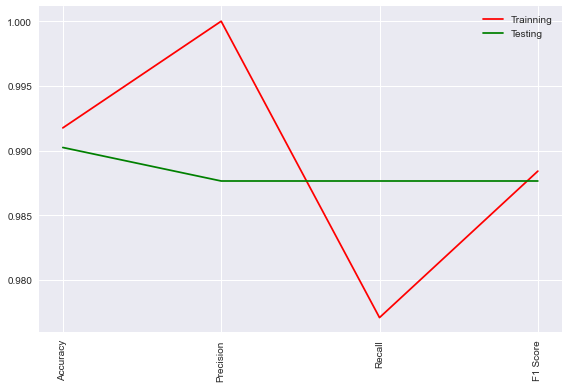

In [58]:
metrics_name = ['Accuracy','Precision','Recall','F1 Score']
train_metrics = [ann_acc_train, ann_pr_train, ann_re_train, ann_f_train]
test_metrics = [ann_acc_test, ann_pr_test, ann_re_test, ann_f_test]
plt.plot(metrics_name,train_metrics,'r')
plt.plot(metrics_name,test_metrics,'g')
plt.xticks(rotation=90)
plt.legend(['Trainning','Testing'],loc ="upper right")
plt.tight_layout()
plt.show()

In [59]:
creator_train = {}
creator_train['Model'] = model_name
creator_train['Accuracy'] = acc_train
creator_train['Precision'] = pres_train
creator_train['Recall'] = rec_train
creator_train['F1 Score'] = f1_train
training_ML_models = pd.DataFrame(creator_train)
training_ML_models

,Model,Accuracy,Precision,Recall,F1 Score
0,C4.5,0.972527,0.991870,0.931298,0.960630
1,CART,0.989011,0.992248,0.977099,0.984615
2,RandomForest,1.000000,1.000000,1.000000,1.000000
3,Gaussian NaiveBayes,0.936813,0.928571,0.893130,0.910506
4,SVM,0.969780,0.991803,0.923664,0.956522
5,KNN,0.953297,0.967213,0.900763,0.932806
6,LogisticRegression,0.975275,0.991935,0.938931,0.964706
7,AdaBoost,1.000000,1.000000,1.000000,1.000000
8,GradientBoosting,1.000000,1.000000,1.000000,1.000000
9,xgb,1.000000,1.000000,1.000000,1.000000


In [60]:
training_ML_models.to_csv('compare_train.csv',index=False)

In [61]:
creator_test = {}
creator_test['Model'] = model_name
creator_test['Accuracy'] = acc_test
creator_test['Precision'] = pres_test
creator_test['Recall'] = rec_test
creator_test['F1 Score'] = f1_test
testing_ML_models = pd.DataFrame(creator_test)
testing_ML_models

,Model,Accuracy,Precision,Recall,F1 Score
0,C4.5,0.892683,0.927536,0.790123,0.853333
1,CART,0.892683,0.893333,0.827160,0.858974
2,RandomForest,0.956098,1.000000,0.888889,0.941176
3,Gaussian NaiveBayes,0.917073,0.910256,0.876543,0.893082
4,SVM,0.975610,0.987179,0.950617,0.968553
5,KNN,0.960976,0.986667,0.913580,0.948718
6,LogisticRegression,0.995122,1.000000,0.987654,0.993789
7,AdaBoost,0.960976,0.962025,0.938272,0.950000
8,GradientBoosting,0.975610,0.987179,0.950617,0.968553
9,xgb,0.970732,0.962963,0.962963,0.962963


In [62]:
testing_ML_models.to_csv('compare_test.csv',index=False)

In [63]:
stack_creator_train = {}
stack_creator_train['Model'] = stack_model_name
stack_creator_train['Accuracy'] = stack_acc_train
stack_creator_train['Precision'] = stack_pres_train
stack_creator_train['Recall'] = stack_rec_train
stack_creator_train['F1 Score'] = stack_f1_train
stack_training_ML_models = pd.DataFrame(stack_creator_train)
stack_training_ML_models

,Model,Accuracy,Precision,Recall,F1 Score
0,Meta Model 1,0.978022,0.992000,0.946565,0.968750
1,Meta Model 2,0.991758,1.000000,0.977099,0.988417
2,Meta Model 3,1.000000,1.000000,1.000000,1.000000
3,Meta Model 4,0.989011,1.000000,0.969466,0.984496
4,Meta Model 5,0.991758,1.000000,0.977099,0.988417
5,Meta Model 6,0.989011,1.000000,0.969466,0.984496
6,Meta Model 7,0.991758,1.000000,0.977099,0.988417
7,Meta Model 8,0.975275,0.991935,0.938931,0.964706


In [64]:
stack_training_ML_models.to_csv('compare_train_stack.csv',index=False)

In [65]:
stack_creator_test = {}
stack_creator_test['Model'] = stack_model_name
stack_creator_test['Accuracy'] = stack_acc_test
stack_creator_test['Precision'] = stack_pres_test
stack_creator_test['Recall'] = stack_rec_test
stack_creator_test['F1 Score'] = stack_f1_test
stack_testing_ML_models = pd.DataFrame(stack_creator_test)
stack_testing_ML_models

,Model,Accuracy,Precision,Recall,F1 Score
0,Meta Model 1,0.980488,0.987342,0.962963,0.975000
1,Meta Model 2,0.990244,1.000000,0.975309,0.987500
2,Meta Model 3,0.980488,1.000000,0.950617,0.974684
3,Meta Model 4,0.990244,1.000000,0.975309,0.987500
4,Meta Model 5,0.990244,1.000000,0.975309,0.987500
5,Meta Model 6,0.985366,0.975610,0.987654,0.981595
6,Meta Model 7,0.990244,1.000000,0.975309,0.987500
7,Meta Model 8,0.985366,0.987500,0.975309,0.981366


In [66]:
stack_testing_ML_models.to_csv('compare_test_stack.csv',index=False)

In [67]:
ann_creator = {}
ann_creator['ANN'] = ['Trainning','Testing']
ann_creator['Accuracy'] = [ann_acc_train,ann_acc_test]
ann_creator['Precision'] = [ann_pr_train,ann_pr_test]
ann_creator['Recall'] = [ann_re_train,ann_re_test]
ann_creator['F1 Score'] = [ann_f_train,ann_f_test]
ann_models = pd.DataFrame(ann_creator)
ann_models

,ANN,Accuracy,Precision,Recall,F1 Score
0,Trainning,0.991758,1.000000,0.977099,0.988417
1,Testing,0.990244,0.987654,0.987654,0.987654


In [68]:
ann_models.to_csv('compare_ann_stack.csv',index=False)